# Setting up the data

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
plt.style.use("seaborn")
import gmaps
import googlemaps
from api_keys import g_key

import requests
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")


import json
import time
from scipy import stats
from scipy.stats import linregress

from matplotlib.colors import to_hex
from matplotlib.cm import viridis
from matplotlib import style
import gmaps.geojson_geometries

## Rent 2020-2022

In [2]:
# displaying the 2020 rent csv file 

rents_2020 = pd.read_csv("UTF/FY2020_50_County_rev.csv")
rents_2020.head()

,fips2010,rent50_0,rent50_1,rent50_2,rent50_3,rent50_4,state,cbsasub20,areaname20,county,cousub,cntyname,name,pop2017,hu2017,state_alpha
0,4805999999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",59,99999,Callahan County,Callahan County,13660,6637,TX
1,4825399999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",253,99999,Jones County,Jones County,19970,7292,TX
2,4844199999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",441,99999,Taylor County,Taylor County,135370,56978,TX
3,7200399999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",3,99999,Aguada Municipio,Aguada Municipio,39470,17385,PR
4,7200599999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",5,99999,Aguadilla Municipio,Aguadilla Municipio,55720,27301,PR


In [3]:
# displaying the 2021 rent csv file 

rents_2021 = pd.read_csv("UTF/FY2021_50_County.csv")
rents_2021.head()

,fips2010,rent50_0,rent50_1,rent50_2,rent50_3,rent50_4,state,cbsasub21,areaname21,county,cousub,cntyname,name,pop2017,hu2017,state_alpha
0,4805999999,761,789,1028,1383,1764,48,METRO10180M10180,"Abilene, TX MSA",59,99999,Callahan County,Callahan County,13660,6637,TX
1,4825399999,761,789,1028,1383,1764,48,METRO10180M10180,"Abilene, TX MSA",253,99999,Jones County,Jones County,19970,7292,TX
2,4844199999,761,789,1028,1383,1764,48,METRO10180M10180,"Abilene, TX MSA",441,99999,Taylor County,Taylor County,135370,56978,TX
3,7200399999,401,414,472,602,720,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",3,99999,Aguada Municipio,Aguada Municipio,39470,17385,PR
4,7200599999,401,414,472,602,720,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",5,99999,Aguadilla Municipio,Aguadilla Municipio,55720,27301,PR


In [4]:
# displaying the 2021 rent csv file 

rents_2022 = pd.read_csv("UTF/FY2022_FMR_50_county_rev.csv")
rents_2022 = rents_2022.rename(columns = {'state_code': 'state', 'county_code': 'county', 'county_sub_code': 'cousub'})
rents_2022.head()

,state,county,cousub,cntyname,town_name,areaname22,rent_50_0,rent_50_1,rent_50_2,rent_50_3,rent_50_4,cbsasub22,pop2017
0,48,59,99999,Callahan County,NaN,"Abilene, TX MSA",715,760,981,1337,1658,METRO10180M10180,13660
1,48,253,99999,Jones County,NaN,"Abilene, TX MSA",715,760,981,1337,1658,METRO10180M10180,19970
2,48,441,99999,Taylor County,NaN,"Abilene, TX MSA",715,760,981,1337,1658,METRO10180M10180,135370
3,72,3,99999,Aguada Municipio,NaN,"Aguadilla-Isabela, PR MSA",407,423,486,604,711,METRO10380M10380,39470
4,72,5,99999,Aguadilla Municipio,NaN,"Aguadilla-Isabela, PR MSA",407,423,486,604,711,METRO10380M10380,55720


## Merging 2020-2022 Datasets

In [5]:
# Merging the 2020 and 2021 dataset and converting them into a data frame 

rent_20_21 = pd.merge(rents_2020, rents_2021, how="left", on=["state", "county", "cousub"], suffixes=('_2020', '_2021'))
rent_20_21.head()

,fips2010_2020,rent50_0_2020,rent50_1_2020,rent50_2_2020,rent50_3_2020,rent50_4_2020,state,cbsasub20,areaname20,county,...,rent50_2_2021,rent50_3_2021,rent50_4_2021,cbsasub21,areaname21,cntyname_2021,name_2021,pop2017_2021,hu2017_2021,state_alpha_2021
0,4805999999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",59,...,1028.0,1383.0,1764.0,METRO10180M10180,"Abilene, TX MSA",Callahan County,Callahan County,13660.0,6637.0,TX
1,4825399999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",253,...,1028.0,1383.0,1764.0,METRO10180M10180,"Abilene, TX MSA",Jones County,Jones County,19970.0,7292.0,TX
2,4844199999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",441,...,1028.0,1383.0,1764.0,METRO10180M10180,"Abilene, TX MSA",Taylor County,Taylor County,135370.0,56978.0,TX
3,7200399999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",3,...,472.0,602.0,720.0,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",Aguada Municipio,Aguada Municipio,39470.0,17385.0,PR
4,7200599999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",5,...,472.0,602.0,720.0,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",Aguadilla Municipio,Aguadilla Municipio,55720.0,27301.0,PR


In [6]:
#merging the above DF to 2022 dataset and convert them into a DataFrame

rent_20_21_22 = pd.merge(rent_20_21, rents_2022, how="left", on=["state", "county", "cousub"])
rent_20_21_22.head()

,fips2010_2020,rent50_0_2020,rent50_1_2020,rent50_2_2020,rent50_3_2020,rent50_4_2020,state,cbsasub20,areaname20,county,...,cntyname,town_name,areaname22,rent_50_0,rent_50_1,rent_50_2,rent_50_3,rent_50_4,cbsasub22,pop2017
0,4805999999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",59,...,Callahan County,NaN,"Abilene, TX MSA",715.0,760.0,981.0,1337.0,1658.0,METRO10180M10180,13660.0
1,4825399999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",253,...,Jones County,NaN,"Abilene, TX MSA",715.0,760.0,981.0,1337.0,1658.0,METRO10180M10180,19970.0
2,4844199999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",441,...,Taylor County,NaN,"Abilene, TX MSA",715.0,760.0,981.0,1337.0,1658.0,METRO10180M10180,135370.0
3,7200399999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",3,...,Aguada Municipio,NaN,"Aguadilla-Isabela, PR MSA",407.0,423.0,486.0,604.0,711.0,METRO10380M10380,39470.0
4,7200599999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",5,...,Aguadilla Municipio,NaN,"Aguadilla-Isabela, PR MSA",407.0,423.0,486.0,604.0,711.0,METRO10380M10380,55720.0


In [8]:
# load rent data
rent = pd.read_csv("rent.csv")

# means grouped by state and year
state_sy = rent.groupby(["state initials", "year"])["state initials"].first().to_list()
year_sy = rent.groupby(["state initials", "year"])["year"].first().to_list()
bed_0_sy = rent.groupby(["state initials", "year"]).mean()["rent50_0"].to_list()
bed_1_sy = rent.groupby(["state initials", "year"]).mean()["rent50_1"].to_list()
bed_2_sy = rent.groupby(["state initials", "year"]).mean()["rent50_2"].to_list()
bed_3_sy = rent.groupby(["state initials", "year"]).mean()["rent50_3"].to_list()
bed_4_sy = rent.groupby(["state initials", "year"]).mean()["rent50_4"].to_list()

rent_summary_sy = pd.DataFrame(
    {'State': state_sy, 'Year': year_sy, 'Studio': bed_0_sy, '1 Bedroom': bed_1_sy,
     '2 Bedroom': bed_2_sy, '3 Bedroom': bed_3_sy, '4 Bedroom': bed_4_sy}).round(2)


# Cleaning Data

In [9]:
# Checking the columns

rent_20_21_22.columns

Index(['fips2010_2020', 'rent50_0_2020', 'rent50_1_2020', 'rent50_2_2020',
       'rent50_3_2020', 'rent50_4_2020', 'state', 'cbsasub20', 'areaname20',
       'county', 'cousub', 'cntyname_2020', 'name_2020', 'pop2017_2020',
       'hu2017_2020', 'state_alpha_2020', 'fips2010_2021', 'rent50_0_2021',
       'rent50_1_2021', 'rent50_2_2021', 'rent50_3_2021', 'rent50_4_2021',
       'cbsasub21', 'areaname21', 'cntyname_2021', 'name_2021', 'pop2017_2021',
       'hu2017_2021', 'state_alpha_2021', 'cntyname', 'town_name',
       'areaname22', 'rent_50_0', 'rent_50_1', 'rent_50_2', 'rent_50_3',
       'rent_50_4', 'cbsasub22', 'pop2017'],
      dtype='object')

In [10]:
# Reducing DataFrame to necessary columns

cleaned_rent_20_21_22 = rent_20_21_22[['state', 'county', 'cntyname_2020', 'state_alpha_2020',\
                                       'rent50_0_2020', 'rent50_0_2021', 'rent_50_0', 'rent50_1_2020',\
               'rent50_1_2021', 'rent_50_1', 'rent50_2_2020', 'rent50_2_2021', 'rent_50_2', 'rent50_3_2020', 'rent50_3_2021',\
               'rent_50_3', 'rent50_4_2020', 'rent50_4_2021', 'rent_50_4', 'pop2017_2020']]

# Renaming columns
cleaned_rent_20_21_22 = cleaned_rent_20_21_22.rename(columns = {'state_alpha_2020': 'state initial', 'cntyname_2020': 'county name', 'rent_50_0': 'studio_2022',\
                                                                'rent50_0_2020': 'studio_2020', 'rent50_0_2021': 'studio_2021', 'rent50_1_2020': 'bedroom_1_2020',\
                                                                'rent50_1_2021': 'bedroom_1_2021', 'rent_50_1': 'bedroom_1_2022', 'rent50_2_2020': 'bedroom_2_2020',\
                                                                'rent50_2_2021': 'bedroom_2_2021', 'rent_50_2': 'bedroom_2_2022', 'rent50_3_2020': 'bedroom_3_2020',\
                                                                'rent50_3_2021': 'bedroom_3_2021', 'rent_50_3': 'bedroom_3_2022', 'rent50_4_2020': 'bedroom_4_2020','rent50_4_2021': 'bedroom_4_2021',\
 
                                                                'rent_50_4': 'bedroom_4_2022', 'pop2017_2020': 'pop2017'})

# Dropping null values from the dataset
cleaned_rent_20_21_22 = cleaned_rent_20_21_22.dropna()
cleaned_rent_20_21_22

,state,county,county name,state initial,studio_2020,studio_2021,studio_2022,bedroom_1_2020,bedroom_1_2021,bedroom_1_2022,bedroom_2_2020,bedroom_2_2021,bedroom_2_2022,bedroom_3_2020,bedroom_3_2021,bedroom_3_2022,bedroom_4_2020,bedroom_4_2021,bedroom_4_2022,pop2017
0,48,59,Callahan County,TX,673,761.0,715.0,699,789.0,760.0,920,1028.0,981.0,1209,1383.0,1337.0,1560,1764.0,1658.0,13660
1,48,253,Jones County,TX,673,761.0,715.0,699,789.0,760.0,920,1028.0,981.0,1209,1383.0,1337.0,1560,1764.0,1658.0,19970
2,48,441,Taylor County,TX,673,761.0,715.0,699,789.0,760.0,920,1028.0,981.0,1209,1383.0,1337.0,1560,1764.0,1658.0,135370
3,72,3,Aguada Municipio,PR,386,401.0,407.0,397,414.0,423.0,452,472.0,486.0,591,602.0,604.0,713,720.0,711.0,39470
4,72,5,Aguadilla Municipio,PR,386,401.0,407.0,397,414.0,423.0,452,472.0,486.0,591,602.0,604.0,713,720.0,711.0,55720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4764,72,133,Santa Isabel Municipio,PR,370,386.0,389.0,373,395.0,396.0,437,450.0,451.0,582,599.0,614.0,656,666.0,674.0,22475
4765,72,147,Vieques Municipio,PR,370,386.0,389.0,373,395.0,396.0,437,450.0,451.0,582,599.0,614.0,656,666.0,674.0,8930
4766,78,10,St. Croix,VI,887,926.0,964.0,905,945.0,984.0,1105,1154.0,1201.0,1377,1435.0,1485.0,1497,1565.0,1629.0,53234
4767,78,20,St. John,VI,1177,1230.0,1280.0,1394,1458.0,1517.0,1733,1812.0,1885.0,2160,2254.0,2330.0,2348,2457.0,2556.0,4197


In [11]:
cleaned_rent_20_21_22.columns

Index(['state', 'county', 'county name', 'state initial', 'studio_2020',
       'studio_2021', 'studio_2022', 'bedroom_1_2020', 'bedroom_1_2021',
       'bedroom_1_2022', 'bedroom_2_2020', 'bedroom_2_2021', 'bedroom_2_2022',
       'bedroom_3_2020', 'bedroom_3_2021', 'bedroom_3_2022', 'bedroom_4_2020',
       'bedroom_4_2021', 'bedroom_4_2022', 'pop2017'],
      dtype='object')

In [44]:
#Exporting CSV Files
#cleaned_rent_20_21_22.to_csv("../Merged_Data/rent20-22.csv")
#cleaned_rent_20_21_22.to_csv("rent20-22.csv")

# Plotting Average Rents for each Bedroom Type (All States 2020-2022)

In [12]:
# Creating a list of the average median rents for 2020 - 2022
averages_2020 = list(cleaned_rent_20_21_22[["studio_2020","bedroom_1_2020","bedroom_2_2020","bedroom_3_2020","bedroom_4_2020"]].mean())
averages_2021 = list(cleaned_rent_20_21_22[["studio_2021","bedroom_1_2021","bedroom_2_2021","bedroom_3_2021","bedroom_4_2021"]].mean())
averages_2022 = list(cleaned_rent_20_21_22[["studio_2022","bedroom_1_2022","bedroom_2_2022","bedroom_3_2022","bedroom_4_2022"]].mean())

In [13]:
# Creating a DataFrame for the averages of 2020-2022
averages_DF = pd.DataFrame({"Average 2020": averages_2020,
                            "Average 2021": averages_2021,
                            "Average 2022": averages_2022
                           })

# Display DataFrame
averages_DF

,Average 2020,Average 2021,Average 2022
0,707.401348,735.416509,769.124868
1,783.532323,810.826069,843.285534
2,976.300063,1011.826911,1052.408718
3,1280.773005,1321.444304,1367.686039
4,1466.904611,1517.088229,1573.461781


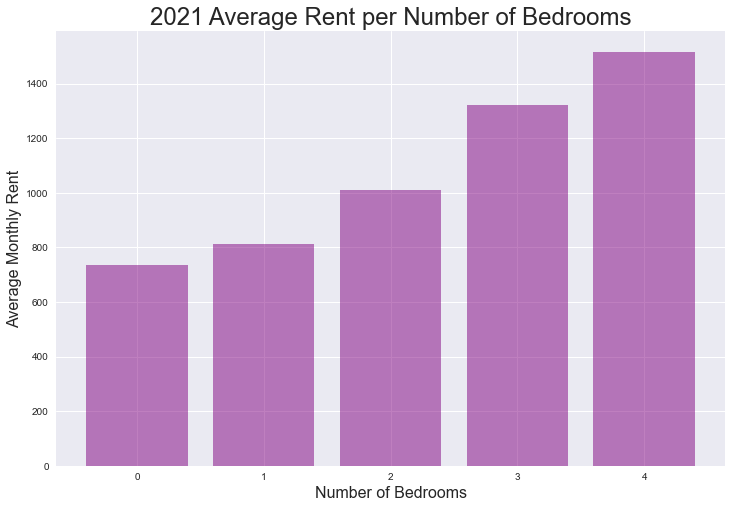

In [15]:
# format edits 

plt.figure(figsize=(12, 8))
x_axis = np.arange(len(averages_DF))
plt.bar(x_axis, averages_DF["Average 2021"], color="purple",alpha=0.5, align="center")


plt.xlabel("Number of Bedrooms", size=16)
plt.ylabel("Average Monthly Rent", size=16)
plt.title("2021 Average Rent per Number of Bedrooms", size=24)
plt.show()

The average monthly price of a 4-bedroom place is $782 higher than a studio apartment. As the number of bedrooms increases, the average monthly price increases as well.

- % Increase from studio to 1 bedroom: 10%
- % Increase from 1 bedroom to 2 bedrooms: 22% 
- % Increase from 2 bedrooms to 3 bedrooms: 26% 
- % Increase from 3 bedrooms to 4 bedrooms: 13% 

## Finding the variability of rents of different bedrooms in all States

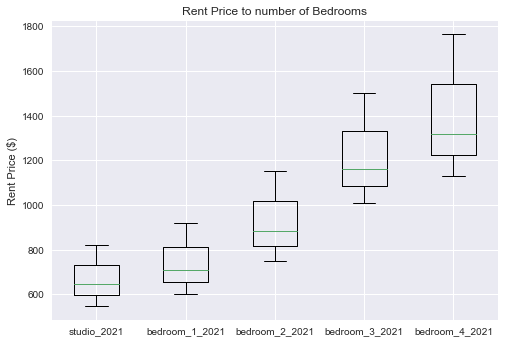

In [46]:
bedroom_amount = ["studio_2021", "bedroom_1_2021", "bedroom_2_2021", "bedroom_3_2021", "bedroom_4_2021"]
bedroom_quantile = []
for room in bedroom_amount:
    bedroom = cleaned_rent_20_21_22.loc[:, room]
    bedroom_quantile.append(bedroom.quantile([.25, .5, .75]))
    
x_axis = np.arange(len(bedroom_amount))
tick_locations = [value + 1 for value in x_axis]
fig1, ax1 = plt.subplots()
ax1.boxplot(bedroom_quantile, sym = 'b')
plt.xticks(tick_locations, bedroom_amount)
plt.title("Rent Price to number of Bedrooms")
plt.ylabel("Rent Price ($)")
plt.show()

## Annual Percentage Change in rent among Different States

In [16]:
# b1 data 2021
b121DF = pd.DataFrame({'State': rent_summary_sy[rent_summary_sy["Year"] == 2021]["State"], 
                         '1 Bedroom': rent_summary_sy[rent_summary_sy["Year"] == 2021]["1 Bedroom"]})
# b1 data 2020
b120DF = pd.DataFrame({'State': rent_summary_sy[rent_summary_sy["Year"] == 2020]["State"], 
                         '1 Bedroom': rent_summary_sy[rent_summary_sy["Year"] == 2020]["1 Bedroom"]})  
# b1 data 2019
b119DF = pd.DataFrame({'State': rent_summary_sy[rent_summary_sy["Year"] == 2019]["State"], 
                         '1 Bedroom': rent_summary_sy[rent_summary_sy["Year"] == 2019]["1 Bedroom"]})  
# b1 data merge
b1DF = pd.merge(b121DF, b120DF, how="inner", on=["State"]).merge(b119DF, on=["State"])
b1DF.columns = ['State',"1 Bedroom '21","1 Bedroom '20","1 Bedroom '19"]

# b1 data calculations
b1DF["'21 diff %"] = 100 * (b1DF["1 Bedroom '21"] - b1DF["1 Bedroom '20"]) / b1DF["1 Bedroom '21"]
b1DF["'20 diff %"] = 100 * (b1DF["1 Bedroom '20"] - b1DF["1 Bedroom '19"]) / b1DF["1 Bedroom '20"]

In [17]:
b1DF.head()

,State,1 Bedroom '21,1 Bedroom '20,1 Bedroom '19,'21 diff %,'20 diff %
0,AK,1012.10,1097.48,1052.83,-8.435925,4.068411
1,AL,626.04,607.66,601.84,2.935915,0.957772
2,AR,574.33,551.45,557.65,3.983772,-1.124309
3,AS,640.00,612.00,547.00,4.375000,10.620915
4,AZ,821.60,777.13,732.87,5.412610,5.695315


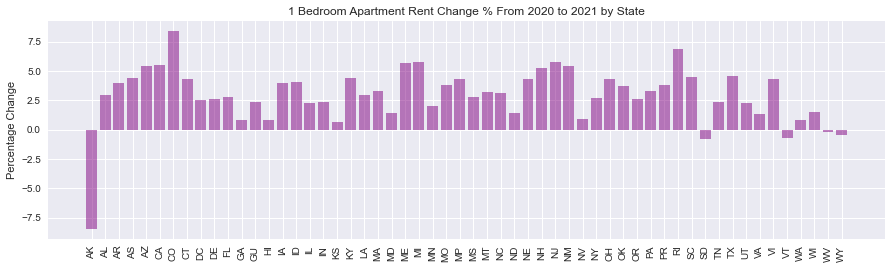

In [23]:
# prepare chart
states = b1DF["State"]
percentage = b1DF["'21 diff %"]

plt.figure(figsize=(15, 4))
plt.xticks(rotation = 90)
plt.bar(states, percentage, color="purple", alpha=0.5)
plt.title('1 Bedroom Apartment Rent Change % From 2020 to 2021 by State')
plt.ylabel("Percentage Change")
plt.show()

# Most Expensive and Least Expensive States by Rent

In [24]:
# Creating DataFrames that shows the average rents per state per bedroom type (using GroupBy function)
state_rent_21_0 = pd.DataFrame(cleaned_rent_20_21_22.groupby(["state initial"]).mean()["studio_2021"])
state_rent_21_1 = pd.DataFrame(cleaned_rent_20_21_22.groupby(["state initial"]).mean()["bedroom_1_2021"])
state_rent_21_2 = pd.DataFrame(cleaned_rent_20_21_22.groupby(["state initial"]).mean()["bedroom_2_2021"])
state_rent_21_3 = pd.DataFrame(cleaned_rent_20_21_22.groupby(["state initial"]).mean()["bedroom_3_2021"])
state_rent_21_4 = pd.DataFrame(cleaned_rent_20_21_22.groupby(["state initial"]).mean()["bedroom_4_2021"])

# Create one joined DF
state_rent_21_all = pd.DataFrame({"Studio Avg. Rent": round(state_rent_21_0["studio_2021"],2),
                                  "1 Bedroom Avg. Rent": round(state_rent_21_1["bedroom_1_2021"],2),
                                  "2 Bedroom Avg. Rent": round(state_rent_21_2["bedroom_2_2021"],2),
                                  "3 Bedroom Avg. Rent": round(state_rent_21_3["bedroom_3_2021"],2),
                                  "4 Bedroom Avg. Rent": round(state_rent_21_4["bedroom_4_2021"],2),
                                 })

In [25]:
# Creating a new column that looks at the average rent for all bedroom types
state_rent_21_all["Avg. All"] = round((state_rent_21_all["Studio Avg. Rent"] + 
                                          state_rent_21_all["1 Bedroom Avg. Rent"] + 
                                          state_rent_21_all["2 Bedroom Avg. Rent"] + 
                                          state_rent_21_all["3 Bedroom Avg. Rent"] + 
                                          state_rent_21_all["4 Bedroom Avg. Rent"])/5,2)

# Top 5 Most Expensive States by Rent Price

In [26]:
top_5_state_rent_21 = state_rent_21_all.sort_values("Avg. All", ascending=False)
top_5_state_rent_21 = top_5_state_rent_21.head()
top_5_state_rent_21

,Studio Avg. Rent,1 Bedroom Avg. Rent,2 Bedroom Avg. Rent,3 Bedroom Avg. Rent,4 Bedroom Avg. Rent,Avg. All
state initial,,,,,,
HI,1391.40,1552.60,1986.60,2739.20,3158.40,2165.64
DC,1643.00,1682.00,1917.00,2457.00,2978.00,2135.40
MA,1254.81,1392.96,1740.68,2181.54,2414.18,1796.83
CA,1137.10,1290.79,1634.78,2254.05,2612.69,1785.88
NJ,1166.43,1353.29,1670.95,2131.10,2445.00,1753.35


# Bottom 5 Most Expensive States by Rent Price

In [28]:
bottom_5_state_rent_21 = state_rent_21_all.sort_values("Avg. All", ascending=True)
bottom_5_state_rent_21 = bottom_5_state_rent_21.head()
bottom_5_state_rent_21

,Studio Avg. Rent,1 Bedroom Avg. Rent,2 Bedroom Avg. Rent,3 Bedroom Avg. Rent,4 Bedroom Avg. Rent,Avg. All
state initial,,,,,,
PR,418.59,448.73,515.82,687.77,818.54,577.89
AR,535.00,574.33,723.04,954.23,1104.27,778.17
MS,573.06,611.72,754.02,974.85,1111.22,804.97
MO,536.25,595.59,762.36,1012.33,1157.58,812.82
KY,548.30,605.41,762.77,1011.48,1144.47,814.49


# Creating a HeatMap Displaying the Most Expensive and Least Expensive States/Counties

In [35]:
# # Configuring API Key
# gmaps.configure(api_keys=g_key)

In [115]:
# Getting the coordinates of each state through a new csv file
state_coordinates = pd.read_csv('state_coordinates.csv')
state_coordinates.head()

,state initial,latitude,longitude,name
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California


In [122]:
# Merging coordinates with the states
state_rent_21_all_new = pd.merge(state_rent_21_all, state_coordinates , how='left', on='state initial')
state_rent_21_all_new = state_rent_21_all_new.dropna()
state_rent_21_all_new
top_5_state_rent_21_new = state_rent_21_all_new.sort_values('Avg. All', ascending=False)
top_5_state_rent_21_new = top_5_state_rent_21_new.head()
bottom_5_state_rent_21_new = state_rent_21_all_new.sort_values('Avg. All', ascending=True)
bottom_5_state_rent_21_new = bottom_5_state_rent_21_new.head()

## Heatmap with States as Weights

In [119]:
# Access maps with unique API key
#gmaps.configure(api_key=g_key)
# create coordinates by joining lat and long
locations = state_rent_21_all_new[['latitude', 'longitude']]
# price as the weights
prices = state_rent_21_all_new['1 Bedroom Avg. Rent']
# Plotting the heatmap
fig = gmaps.figure(center=(39.8097343, -98.5556199), zoom_level=4)
# Create heat layer
heatLayer = gmaps.heatmap_layer(locations, weights=prices, max_intensity=800, dissipating=True)
# Add layer
fig.add_layer(heatLayer)
# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

## 5 Most Expensive States Plotted on Heatmap

In [120]:
# Store the locations
coordinates1 = top_5_state_rent_21_new[['latitude', 'longitude']]
# Plotting the heatmap
fig1 = gmaps.figure(center=(39.8097343, -98.5556199), zoom_level=4)
# Add layer
fig1.add_layer(heatLayer)
# Add a marker layer on the heatmap
markerLayer = gmaps.marker_layer(coordinates1)
# Add marker layers
fig1.add_layer(markerLayer)
# display figure
fig1

Figure(layout=FigureLayout(height='420px'))

Above are the mark layers for the most expensive states (Hawaii, DC, Massachussets, California, New Jersey

## 5 Least Expensive States Plotted on Heatmap

In [123]:
# Store the locations
coordinates2 = bottom_5_state_rent_21_new[['latitude', 'longitude']]
# Plotting the heatmap
fig2 = gmaps.figure(center=(39.8097343, -98.5556199), zoom_level=4)
# Add layer
fig2.add_layer(heatLayer)
# Add a marker layer on the heatmap
markerLayer = gmaps.marker_layer(coordinates2)
# Add marker layers
fig2.add_layer(markerLayer)
# display figure
fig2

Figure(layout=FigureLayout(height='420px'))

Above are mark layers for the least expensive states (Puerto Rico, Arkansas, Mississippi, Missouri, Kentucky)

## Decided to not move to another State, and stay in GA. Where do I go now? Which Counties in Georgia do I look into ?

In [53]:
# Checking the rents for GA 

GA_Rents1 = cleaned_rent_20_21_22.loc[(cleaned_rent_20_21_22['state initial'] == 'GA')]

GA_Rents = pd.DataFrame(GA_Rents1)
GA_Rents


,state,county,county name,state initial,studio_2020,studio_2021,studio_2022,bedroom_1_2020,bedroom_1_2021,bedroom_1_2022,...,bedroom_2_2022,bedroom_3_2020,bedroom_3_2021,bedroom_3_2022,bedroom_4_2020,bedroom_4_2021,bedroom_4_2022,pop2017,latitude,longitude
14,13,7,Baker County,GA,643,668.0,562.0,666,690.0,581.0,...,704.0,1031,1054.0,887.0,1151,1215.0,1036.0,3250,44.76523,-117.67692
15,13,95,Dougherty County,GA,643,668.0,711.0,666,690.0,737.0,...,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,91520,31.543937,-84.22788
16,13,177,Lee County,GA,643,668.0,711.0,666,690.0,737.0,...,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,29215,26.663029,-81.953481
17,13,273,Terrell County,GA,643,668.0,711.0,666,690.0,737.0,...,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,8980,30.234861,-102.163272
18,13,321,Worth County,GA,643,668.0,711.0,666,690.0,737.0,...,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,20810,31.528249,-83.889706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,13,309,Wheeler County,GA,513,507.0,545.0,516,510.0,549.0,...,704.0,939,927.0,870.0,998,975.0,955.0,7950,44.665977,-120.082962
2296,13,311,White County,GA,602,619.0,693.0,606,623.0,698.0,...,827.0,1010,1006.0,1052.0,1035,1035.0,1121.0,28510,34.656773,-83.719914
2297,13,315,Wilcox County,GA,513,507.0,545.0,516,510.0,549.0,...,704.0,811,865.0,1000.0,998,975.0,1036.0,8895,32.010544,-87.34136
2298,13,317,Wilkes County,GA,557,558.0,592.0,560,562.0,596.0,...,784.0,939,975.0,1035.0,1132,1114.0,1154.0,9905,36.202858,-81.251883


### Checking the Rents for Counties in alphabetical order

In [54]:
#first 50 counties 
Fifty_Counties_Rent = pd.DataFrame(GA_Rents)
Fifty_counties_Cleaned_0 = Fifty_Counties_Rent.sort_values("county name", ascending=True) #alphabetical order by county name
Fifty_counties_Cleaned = Fifty_counties_Cleaned_0.head(50)
#Fifty_counties_Cleaned

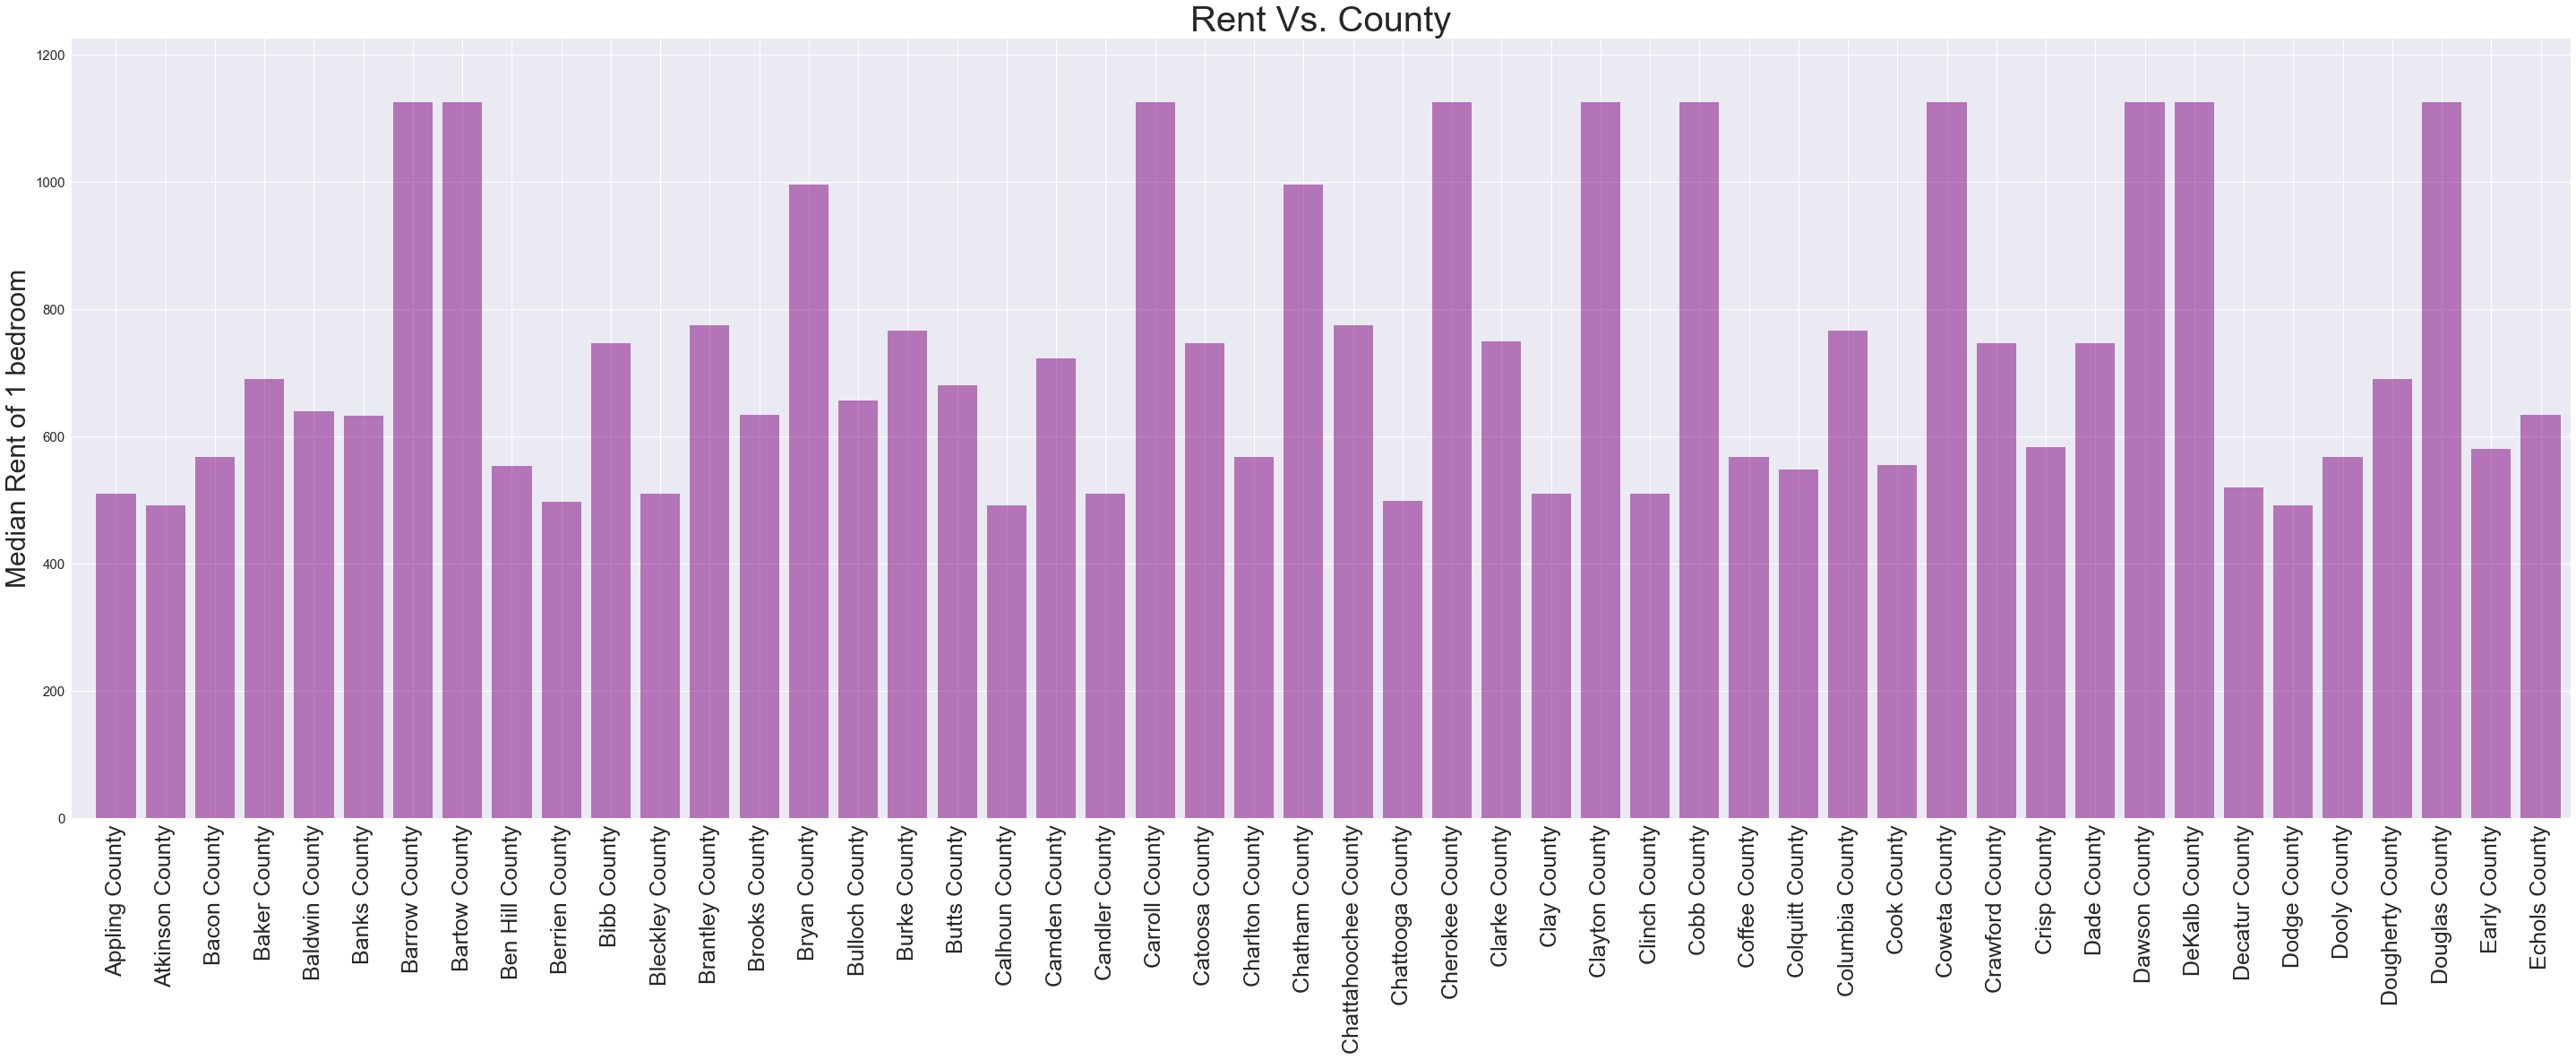

In [55]:
# Plotting a Bar chart for the 1st 50 counties 
# # Set x axis and tick locations
x_axis = np.arange(len(Fifty_counties_Cleaned))
tick_locations = [value+0.4 for value in x_axis]

#Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(50,16))

#create the bar chart 
plt.bar(x_axis, Fifty_counties_Cleaned["bedroom_1_2021"], color = "purple", alpha = 0.5, align ="edge")
plt.xticks(tick_locations, Fifty_counties_Cleaned["county name"], rotation="vertical")

#Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, max(Fifty_counties_Cleaned["bedroom_1_2021"])+100)

#Set a Title and labels
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize= 25)
plt.title("Rent Vs. County", fontsize = 40)
#plt.xlabel("County", fontsize =30)
plt.ylabel("Median Rent of 1 bedroom" , fontsize = 30 )

#Save our graph and show the graph
#plt.tight_layout()
plt.savefig("../Maheen/bar_chart_50_counties.png")
plt.show()


In [56]:
# Displaying the second 50 counties 
Second_fifty_counties = Fifty_counties_Cleaned_0.iloc[50:101]
#Second_fifty_counties

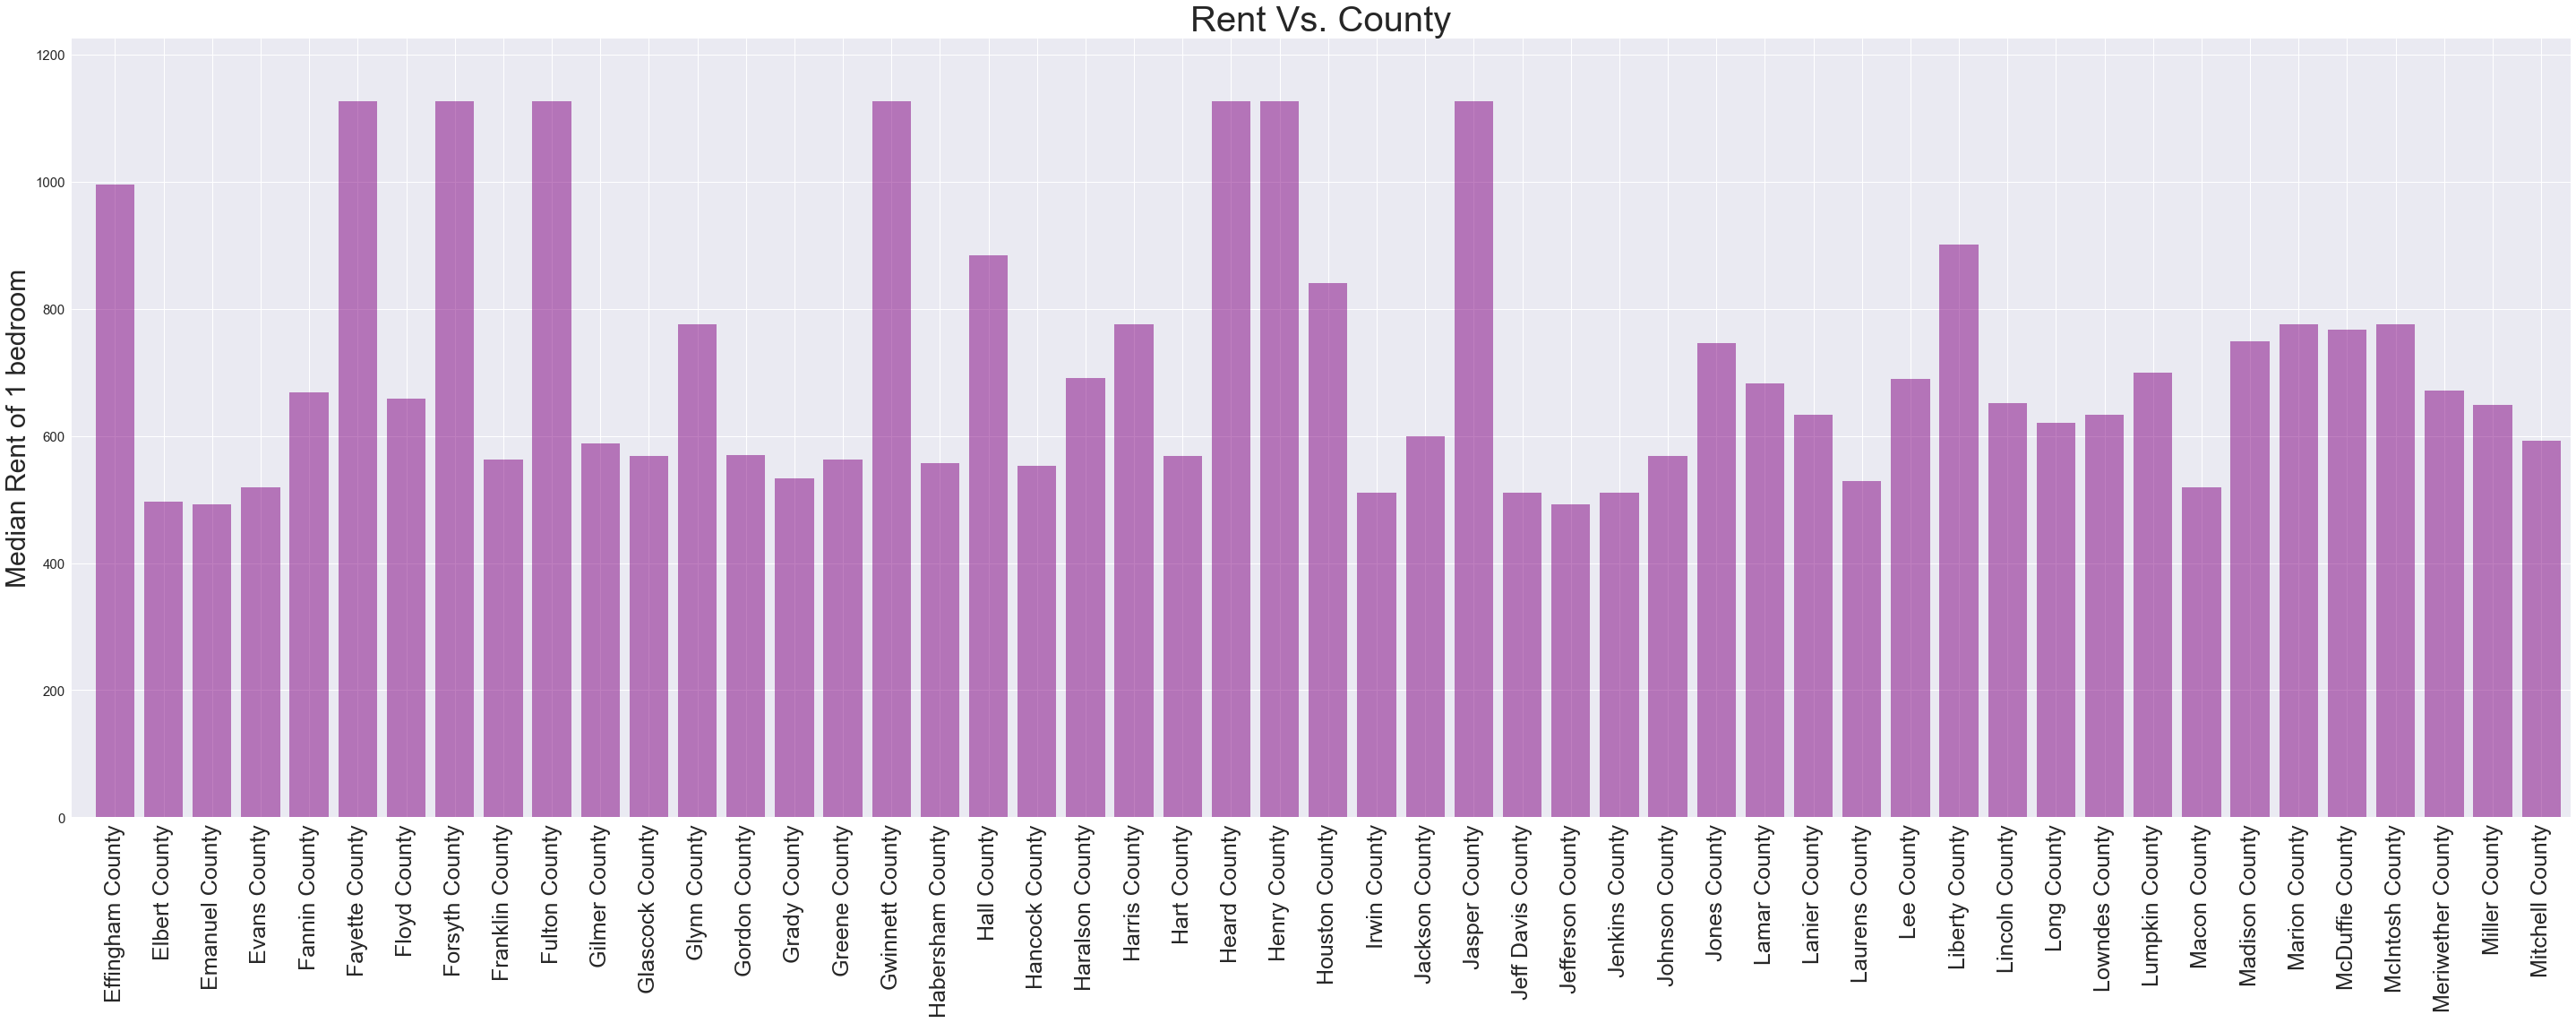

In [57]:
# Plotting a Chart for the next 50 in Georgia

# Set x axis and tick locations
x_axis = np.arange(len(Second_fifty_counties))
tick_locations = [value+0.4 for value in x_axis]

#Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(50,16))

#create the bar chart 
plt.bar(x_axis, Second_fifty_counties["bedroom_1_2021"], color = "purple", alpha = 0.5, align ="edge")
plt.xticks(tick_locations, Second_fifty_counties["county name"], rotation="vertical")

#Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, max(Second_fifty_counties["bedroom_1_2021"])+100)

#Set a Title and labels
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize= 25)
plt.title("Rent Vs. County", fontsize = 40)
#plt.xlabel("County", fontsize =30)
plt.ylabel("Median Rent of 1 bedroom" , fontsize = 30 )

#Save our graph and show the graph
#plt.tight_layout()
plt.savefig("../Maheen/bar_chart_2nd_50_counties.png")
plt.show()


In [58]:
# Checking the rent for  56 counties in Georgia and plotting the graph 

#Fifty_counties_Cleaned_0

Last_56_counties =  Fifty_counties_Cleaned_0.iloc[102:159]
#Last_56_counties


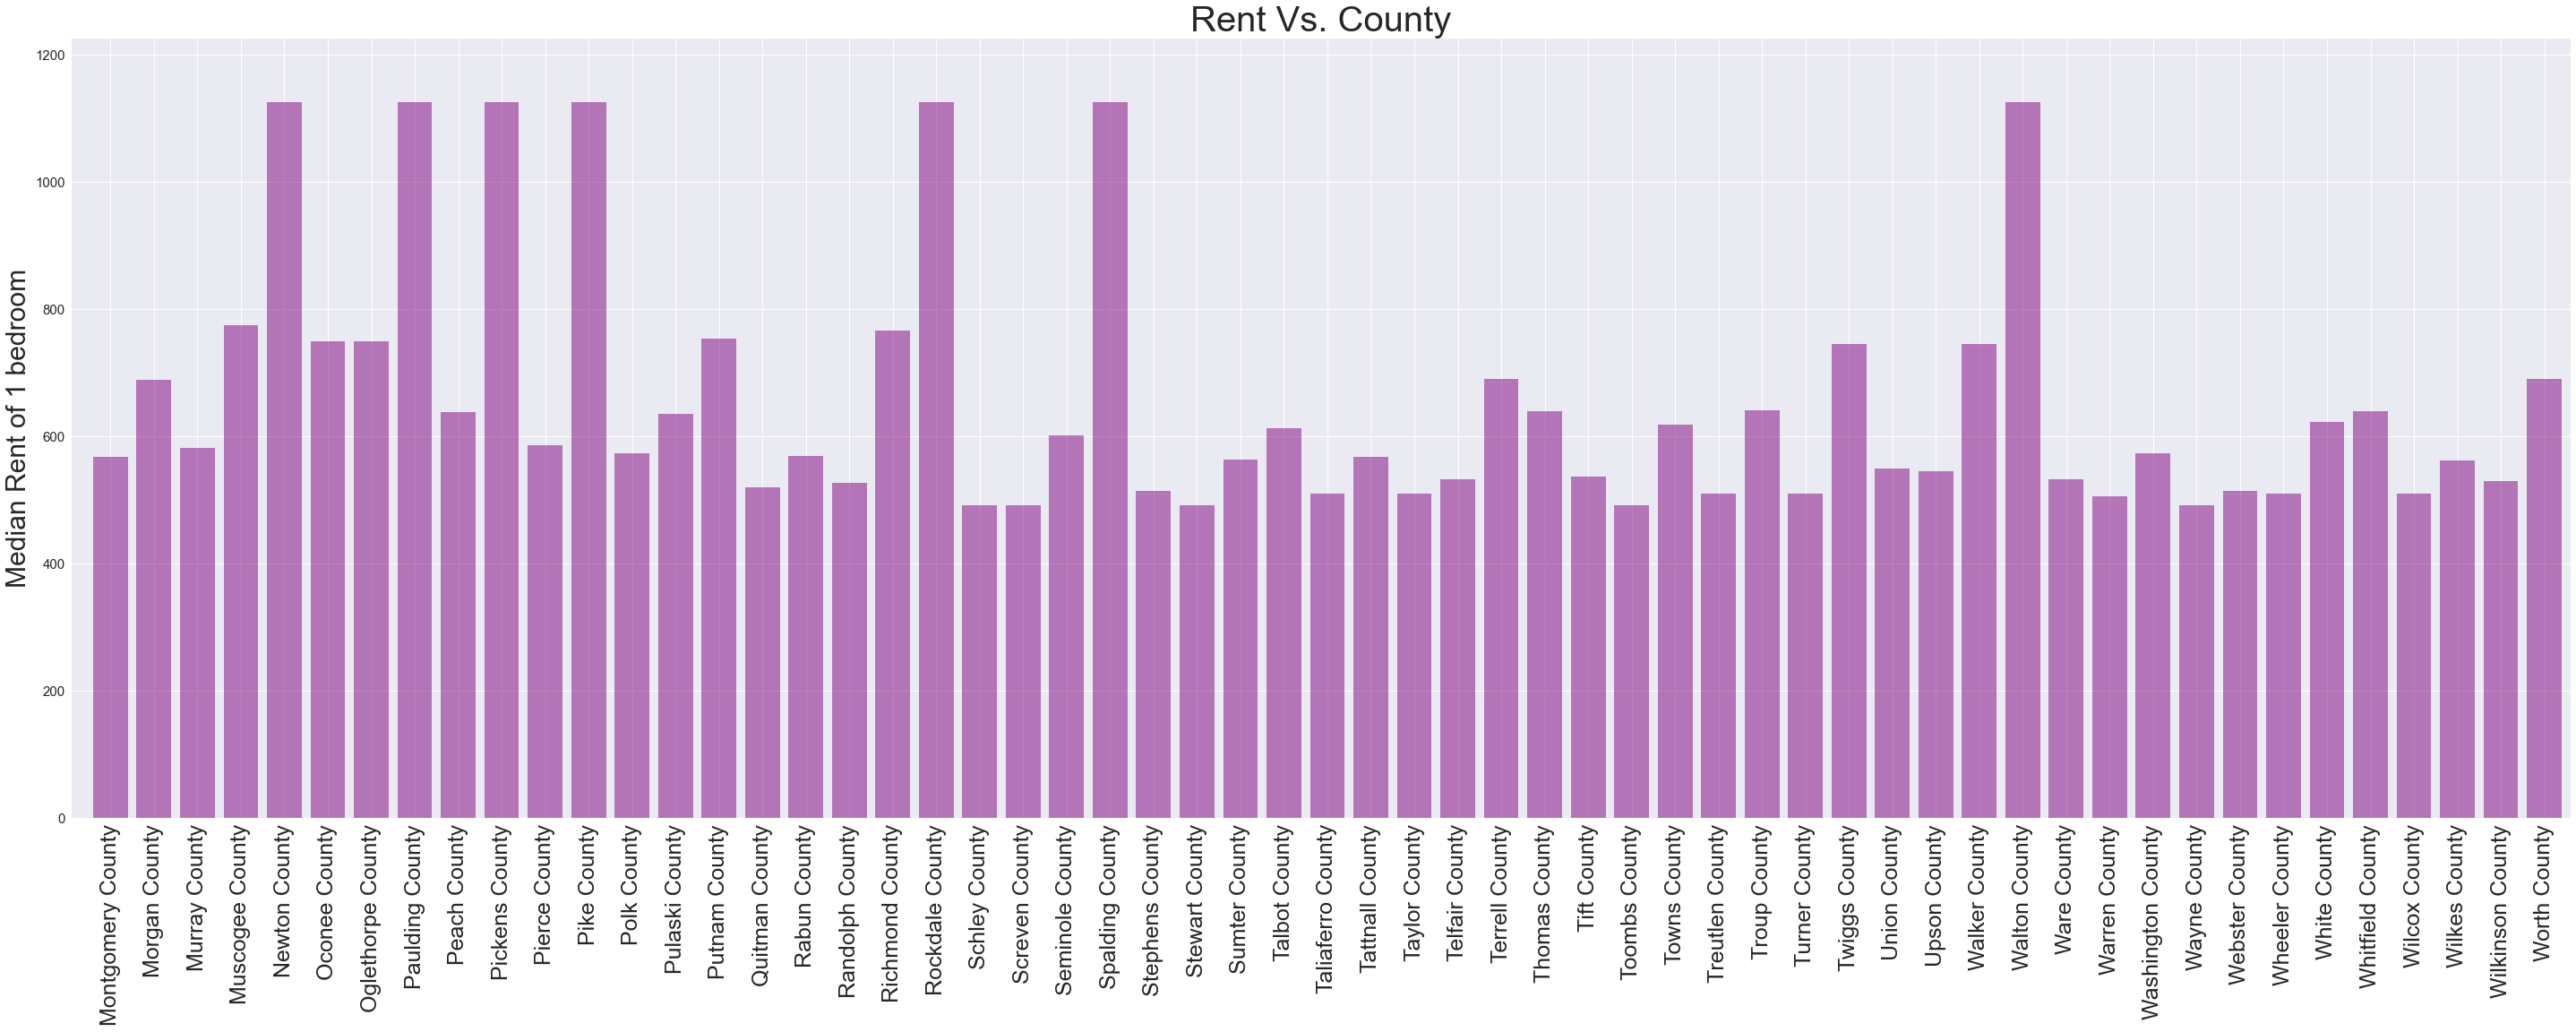

In [59]:
# PLotting a Graph for the last 56 counties in Georgia 

# Set x axis and tick locations
x_axis = np.arange(len(Last_56_counties))
tick_locations = [value+0.4 for value in x_axis]

#Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(50,16))

#create the bar chart 
plt.bar(x_axis, Last_56_counties["bedroom_1_2021"], color = "purple", alpha = 0.5, align ="edge")
plt.xticks(tick_locations, Last_56_counties["county name"], rotation="vertical")

#Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, max(Last_56_counties["bedroom_1_2021"])+100)

#Set a Title and labels
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize= 25)
plt.title("Rent Vs. County", fontsize = 40)
#plt.xlabel("County", fontsize =30)
plt.ylabel("Median Rent of 1 bedroom" , fontsize = 30 )

#Save our graph and show the graph
#plt.tight_layout()
plt.savefig("../Maheen/bar_chart_Last_56_counties.png")
plt.show()


### Trying to understand the correlation between population and rents in GA counties

R value: 0.5255927725853486


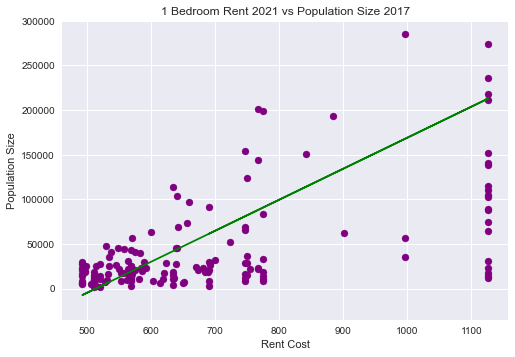

In [64]:
r = np.corrcoef(GA_Rents["bedroom_1_2021"], GA_Rents["pop2017"])
m, b = np.polyfit(GA_Rents["bedroom_1_2021"], GA_Rents["pop2017"], 1)
print(f"R value: {r[0][1]}")

plt.scatter(GA_Rents["bedroom_1_2021"], GA_Rents["pop2017"], color = "purple")
plt.plot(GA_Rents["bedroom_1_2021"], (m * GA_Rents["bedroom_1_2021"]) + b, color = "green")

plt.xlabel("Rent Cost")
plt.ylabel("Population Size")
plt.ylim(bottom = -35000, top = 300000)
plt.title("1 Bedroom Rent 2021 vs Population Size 2017")
plt.grid(True)
plt.show()

In [75]:
#filter out only GA
ga_df = cleaned_rent_20_21_22['state'] == 13
clean_ga_df= cleaned_rent_20_21_22[ga_df]
clean_ga_df

,state,county,county name,state initial,studio_2020,studio_2021,studio_2022,bedroom_1_2020,bedroom_1_2021,bedroom_1_2022,...,bedroom_2_2022,bedroom_3_2020,bedroom_3_2021,bedroom_3_2022,bedroom_4_2020,bedroom_4_2021,bedroom_4_2022,pop2017,latitude,longitude
14,13,7,Baker County,GA,643,668.0,562.0,666,690.0,581.0,...,704.0,1031,1054.0,887.0,1151,1215.0,1036.0,3250,44.76523,-117.67692
15,13,95,Dougherty County,GA,643,668.0,711.0,666,690.0,737.0,...,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,91520,31.543937,-84.22788
16,13,177,Lee County,GA,643,668.0,711.0,666,690.0,737.0,...,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,29215,26.663029,-81.953481
17,13,273,Terrell County,GA,643,668.0,711.0,666,690.0,737.0,...,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,8980,30.234861,-102.163272
18,13,321,Worth County,GA,643,668.0,711.0,666,690.0,737.0,...,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,20810,31.528249,-83.889706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,13,309,Wheeler County,GA,513,507.0,545.0,516,510.0,549.0,...,704.0,939,927.0,870.0,998,975.0,955.0,7950,44.665977,-120.082962
2296,13,311,White County,GA,602,619.0,693.0,606,623.0,698.0,...,827.0,1010,1006.0,1052.0,1035,1035.0,1121.0,28510,34.656773,-83.719914
2297,13,315,Wilcox County,GA,513,507.0,545.0,516,510.0,549.0,...,704.0,811,865.0,1000.0,998,975.0,1036.0,8895,32.010544,-87.34136
2298,13,317,Wilkes County,GA,557,558.0,592.0,560,562.0,596.0,...,784.0,939,975.0,1035.0,1132,1114.0,1154.0,9905,36.202858,-81.251883


In [76]:
#Export the County seat csv file and convert to DF

counties_df = pd.read_csv('list-counties-georgia.csv')
counties_df

,Sr.No,county name,FIPS code,County seat,Established
0,1,Appling County,1,Baxley,1818
1,2,Atkinson County,3,Pearson,1917
2,3,Bacon County,5,Alma,1914
3,4,Baker County,7,Newton,1825
4,5,Baldwin County,9,Milledgeville,1803
...,...,...,...,...,...
154,155,Whitfield County,313,Dalton,1851
155,156,Wilcox County,315,Abbeville,1857
156,157,Wilkes County,317,Washington,1777
157,158,Wilkinson County,319,Irwinton,1803


In [77]:
# Merge the County seat with the Georgia rents DataFrame 

rent_per_county = pd.merge(clean_ga_df, counties_df, how="left", on=["county name"])
rent_per_county

,state,county,county name,state initial,studio_2020,studio_2021,studio_2022,bedroom_1_2020,bedroom_1_2021,bedroom_1_2022,...,bedroom_4_2020,bedroom_4_2021,bedroom_4_2022,pop2017,latitude,longitude,Sr.No,FIPS code,County seat,Established
0,13,7,Baker County,GA,643,668.0,562.0,666,690.0,581.0,...,1151,1215.0,1036.0,3250,44.76523,-117.67692,4,7,Newton,1825
1,13,95,Dougherty County,GA,643,668.0,711.0,666,690.0,737.0,...,1151,1215.0,1359.0,91520,31.543937,-84.22788,47,95,Albany,1853
2,13,177,Lee County,GA,643,668.0,711.0,666,690.0,737.0,...,1151,1215.0,1359.0,29215,26.663029,-81.953481,88,177,Leesburg,1826
3,13,273,Terrell County,GA,643,668.0,711.0,666,690.0,737.0,...,1151,1215.0,1359.0,8980,30.234861,-102.163272,135,273,Dawson,1856
4,13,321,Worth County,GA,643,668.0,711.0,666,690.0,737.0,...,1151,1215.0,1359.0,20810,31.528249,-83.889706,159,321,Sylvester,1853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,13,309,Wheeler County,GA,513,507.0,545.0,516,510.0,549.0,...,998,975.0,955.0,7950,44.665977,-120.082962,153,309,Alamo,1912
155,13,311,White County,GA,602,619.0,693.0,606,623.0,698.0,...,1035,1035.0,1121.0,28510,34.656773,-83.719914,154,311,Cleveland,1857
156,13,315,Wilcox County,GA,513,507.0,545.0,516,510.0,549.0,...,998,975.0,1036.0,8895,32.010544,-87.34136,156,315,Abbeville,1857
157,13,317,Wilkes County,GA,557,558.0,592.0,560,562.0,596.0,...,1132,1114.0,1154.0,9905,36.202858,-81.251883,157,317,Washington,1777


In [78]:
clean_rent_per_county = rent_per_county[["state", "county name", "County seat","state initial","studio_2021","bedroom_1_2021", "bedroom_2_2021", "bedroom_3_2021", "bedroom_4_2021", "pop2017"]]
clean_rent_per_county


,state,county name,County seat,state initial,studio_2021,bedroom_1_2021,bedroom_2_2021,bedroom_3_2021,bedroom_4_2021,pop2017
0,13,Baker County,Newton,GA,668.0,690.0,814.0,1054.0,1215.0,3250
1,13,Dougherty County,Albany,GA,668.0,690.0,814.0,1054.0,1215.0,91520
2,13,Lee County,Leesburg,GA,668.0,690.0,814.0,1054.0,1215.0,29215
3,13,Terrell County,Dawson,GA,668.0,690.0,814.0,1054.0,1215.0,8980
4,13,Worth County,Sylvester,GA,668.0,690.0,814.0,1054.0,1215.0,20810
...,...,...,...,...,...,...,...,...,...,...
154,13,Wheeler County,Alamo,GA,507.0,510.0,648.0,927.0,975.0,7950
155,13,White County,Cleveland,GA,619.0,623.0,763.0,1006.0,1035.0,28510
156,13,Wilcox County,Abbeville,GA,507.0,510.0,648.0,865.0,975.0,8895
157,13,Wilkes County,Washington,GA,558.0,562.0,740.0,975.0,1114.0,9905


In [73]:
#Run a test to show lat and lng is found for each county center
base_url = "https://maps.googleapis.com/maps/api/geocode/json"
Lat=[]
Lng=[]
countySeatsGa= []
countySeatstest = clean_rent_per_county['County seat'].tolist()
for x in countySeatstest:
    target_city = f"{x}, Georgia"
    params = {"address": target_city, "key": g_key}
    
    response = requests.get(base_url, params=params).json()
    
    try:
        lat = response["results"][0]["geometry"]["location"]["lat"]
        lng = response["results"][0]["geometry"]["location"]["lng"]
        Lat.append(lat)
        Lng.append(lng)
        countySeatsGa.append(target_city)
        print(f"{target_city} found!")
    except:
        print(f"{target_city} not found, skipping")
# Extract lat/lng
    
# Print results
print("done")

Newton, Georgia found!
Albany, Georgia found!
Leesburg, Georgia found!
Dawson, Georgia found!
Sylvester, Georgia found!
Athens, Georgia found!
Danielsville, Georgia found!
Watkinsville, Georgia found!
Lexington, Georgia found!
Winder, Georgia found!
Cartersville, Georgia found!
Carrollton, Georgia found!
Canton, Georgia found!
Jonesboro, Georgia found!
Marietta, Georgia found!
Newnan, Georgia found!
Dawsonville, Georgia found!
Decatur, Georgia found!
Douglasville, Georgia found!
Fayetteville, Georgia found!
Cumming, Georgia found!
Atlanta, Georgia found!
Lawrenceville, Georgia found!
Franklin, Georgia found!
McDonough, Georgia found!
Monticello, Georgia found!
Covington, Georgia found!
Dallas, Georgia found!
Jasper, Georgia found!
Zebulon, Georgia found!
Conyers, Georgia found!
Griffin, Georgia found!
Monroe, Georgia found!
Jackson, Georgia found!
Buchanan, Georgia found!
Barnesville, Georgia found!
Greenville, Georgia found!
Madison, Georgia found!
Waynesboro, Georgia found!
Appling, 

In [79]:
#Add lat and lng to dataframe
coord_county = pd.DataFrame(clean_rent_per_county)
coord_county['lat'] = Lat
coord_county['lng'] = Lng
coord_county['coordinates'] = list(zip(coord_county.lat, coord_county.lng))
coord_county

,state,county name,County seat,state initial,studio_2021,bedroom_1_2021,bedroom_2_2021,bedroom_3_2021,bedroom_4_2021,pop2017,lat,lng,coordinates
0,13,Baker County,Newton,GA,668.0,690.0,814.0,1054.0,1215.0,3250,31.312957,-84.335742,"(31.3129575, -84.3357424)"
1,13,Dougherty County,Albany,GA,668.0,690.0,814.0,1054.0,1215.0,91520,31.578507,-84.155741,"(31.5785074, -84.15574099999999)"
2,13,Lee County,Leesburg,GA,668.0,690.0,814.0,1054.0,1215.0,29215,31.732116,-84.170742,"(31.7321156, -84.1707423)"
3,13,Terrell County,Dawson,GA,668.0,690.0,814.0,1054.0,1215.0,8980,31.773500,-84.446583,"(31.7735001, -84.4465826)"
4,13,Worth County,Sylvester,GA,668.0,690.0,814.0,1054.0,1215.0,20810,31.530735,-83.835454,"(31.5307349, -83.8354542)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,13,Wheeler County,Alamo,GA,507.0,510.0,648.0,927.0,975.0,7950,32.147120,-82.777917,"(32.1471202, -82.7779171)"
155,13,White County,Cleveland,GA,619.0,623.0,763.0,1006.0,1035.0,28510,34.597040,-83.763237,"(34.5970402, -83.7632366)"
156,13,Wilcox County,Abbeville,GA,507.0,510.0,648.0,865.0,975.0,8895,31.992122,-83.306824,"(31.9921223, -83.3068243)"
157,13,Wilkes County,Washington,GA,558.0,562.0,740.0,975.0,1114.0,9905,33.736795,-82.739309,"(33.7367948, -82.7393089)"


In [81]:
coord_county[coord_county["county name"] == "Chatham County"]

,state,county name,County seat,state initial,studio_2021,bedroom_1_2021,bedroom_2_2021,bedroom_3_2021,bedroom_4_2021,pop2017,lat,lng,coordinates
65,13,Chatham County,Savannah,GA,948.0,996.0,1135.0,1559.0,1806.0,285505,32.080899,-81.091203,"(32.0808989, -81.091203)"


# Highest and lowest population Map

In [83]:
replacement_max = coord_county["pop2017"].nlargest(5)
min_pop = min(coord_county["pop2017"])

max_pop = replacement_max[65]
pop_range = max_pop - min_pop

def calculate_color(pop):
    norm = (pop - min_pop) / pop_range

    # invert pop so that high inequality gives dark color
    inv = 1.0 - norm

    # transform the pop coefficient to a matplotlib color
    color = viridis(inv)

    # transform from a matplotlib color to a valid CSS color
    gmaps_color = to_hex(color, keep_alpha=False)
    return gmaps_color

#gmaps.configure(api_keys=g_key)
county_geojson = gmaps.geojson_geometries.load_geometry('us-counties')
geojson_layer = gmaps.geojson_layer(county_geojson)
coord_county["county"] = coord_county["county name"].str.split('\s+').str[0]

colors = []
for feature in county_geojson['features']:
    if feature['properties']['STATE'] == '13':
        county = coord_county[coord_county['county'].str.contains(feature['properties']['NAME'])]
        try:
            color = calculate_color(county["pop2017"])
        except:
            color = (0, 0, 0, 0.3)
        colors.append(color)

ga_county = {'type': 'FeatureCollection', 'features':[]}

for feature in county_geojson['features']:
    if feature['properties']['STATE'] == '13':
        ga_county['features'].append(feature)
        
high_pop = coord_county.sort_values("pop2017", ascending=False)
high_pop = high_pop[:5]
low_pop = coord_county.sort_values("pop2017", ascending=True)
low_pop = low_pop[:5]
pop_lows_highs = pd.concat([high_pop, low_pop])

info_box_template = """
<dl>
<dt>County</dt><dd>{county}</dd>
<dt>Population</dt><dd>{pop2017}</dd>
<dt>One bedroom rent</dt><dd>${bedroom_1_2021}</dd>
</dl>
"""
pop_info = [info_box_template.format(**row) for index, row in pop_lows_highs.iterrows()]
locations = pop_lows_highs[["lat", "lng"]]


fig = gmaps.figure()
pop_layer = gmaps.geojson_layer(
    ga_county,
    fill_color=colors,
    stroke_color=colors,
    fill_opacity=0.8)
fig.add_layer(pop_layer)
fig.add_layer(gmaps.marker_layer(locations, info_box_content = pop_info))
fig

Figure(layout=FigureLayout(height='420px'))

### In the above map , the top 5 counties with highest population are Cobb, Fulton, DeKalb, Gwinnett, Taliaferro counties

### And the counties with the least population are Glascock, Chatham, Quitman, Webster, Clay counties

 ## Converting  the counties into the distances from the centre of Atlanta 

In [85]:
distance = []
origin = "Atlanta, Georgia"
destinations = coord_county.coordinates

gmaps = googlemaps.Client(key=g_key)
for destination in destinations:
    results = gmaps.distance_matrix(origin, destination, mode = 'driving')["rows"][0]["elements"][0]["distance"]["value"]
    results = round(results/1609)
    distance.append(results)

coord_county["Distance (miles)"] = distance
coord_county

,state,county name,County seat,state initial,studio_2021,bedroom_1_2021,bedroom_2_2021,bedroom_3_2021,bedroom_4_2021,pop2017,lat,lng,coordinates,county,Distance (miles)
0,13,Baker County,Newton,GA,668.0,690.0,814.0,1054.0,1215.0,3250,31.312957,-84.335742,"(31.3129575, -84.3357424)",Baker,205
1,13,Dougherty County,Albany,GA,668.0,690.0,814.0,1054.0,1215.0,91520,31.578507,-84.155741,"(31.5785074, -84.15574099999999)",Dougherty,182
2,13,Lee County,Leesburg,GA,668.0,690.0,814.0,1054.0,1215.0,29215,31.732116,-84.170742,"(31.7321156, -84.1707423)",Lee,176
3,13,Terrell County,Dawson,GA,668.0,690.0,814.0,1054.0,1215.0,8980,31.773500,-84.446583,"(31.7735001, -84.4465826)",Terrell,167
4,13,Worth County,Sylvester,GA,668.0,690.0,814.0,1054.0,1215.0,20810,31.530735,-83.835454,"(31.5307349, -83.8354542)",Worth,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,13,Wheeler County,Alamo,GA,507.0,510.0,648.0,927.0,975.0,7950,32.147120,-82.777917,"(32.1471202, -82.7779171)",Wheeler,160
155,13,White County,Cleveland,GA,619.0,623.0,763.0,1006.0,1035.0,28510,34.597040,-83.763237,"(34.5970402, -83.7632366)",White,81
156,13,Wilcox County,Abbeville,GA,507.0,510.0,648.0,865.0,975.0,8895,31.992122,-83.306824,"(31.9921223, -83.3068243)",Wilcox,152
157,13,Wilkes County,Washington,GA,558.0,562.0,740.0,975.0,1114.0,9905,33.736795,-82.739309,"(33.7367948, -82.7393089)",Wilkes,110


In [86]:
#Write DataFrame to CSV 
coord_county.to_csv("Rent Based on Distance.csv")

In [87]:
#create dataframe for one bedroom apt
new_rent = coord_county[["state", "county name", "County seat","state initial", "Distance (miles)", "bedroom_1_2021", "lat", "lng"]]


In [88]:
#show top 10 low rent prices

#filter out rent <= 492
low_rent = new_rent['bedroom_1_2021'] ==492
clean_low_rent = new_rent[low_rent]

#make clean_low_rent into a dataframe
min_rent = pd.DataFrame(clean_low_rent)
min_rent

,state,county name,County seat,state initial,Distance (miles),bedroom_1_2021,lat,lng
75,13,Atkinson County,Pearson,GA,222,492.0,31.297703,-82.852367
83,13,Calhoun County,Morgan,GA,182,492.0,31.537673,-84.599360
95,13,Dodge County,Eastman,GA,138,492.0,32.197673,-83.177651
99,13,Emanuel County,Swainsboro,GA,176,492.0,32.597386,-82.333738
114,13,Jefferson County,Louisville,GA,145,492.0,33.001541,-82.411238
129,13,Schley County,Ellaville,GA,125,492.0,32.238214,-84.309080
130,13,Screven County,Sylvania,GA,204,492.0,32.750444,-81.636776
133,13,Stewart County,Lumpkin,GA,141,492.0,32.050990,-84.799090
142,13,Toombs County,Lyons,GA,186,492.0,32.204355,-82.321791
152,13,Wayne County,Jesup,GA,231,492.0,31.607436,-81.885392


In [89]:
#sort in descending order for bedroom price and show top 10 high rent prices
#coord_county.sort_values(by='bedroom_1_2021', ascending = False).head(10)
#filter out rent == 492
high_rent = new_rent['bedroom_1_2021'] ==1126
clean_high_rent = new_rent[high_rent]

#make clean_low_rent into a dataframe
max_rent = pd.DataFrame(clean_high_rent)
max_rent

,state,county name,County seat,state initial,Distance (miles),bedroom_1_2021,lat,lng
9,13,Barrow County,Winder,GA,50,1126.0,33.992610,-83.720171
10,13,Bartow County,Cartersville,GA,43,1126.0,34.165097,-84.799938
11,13,Carroll County,Carrollton,GA,50,1126.0,33.580110,-85.076611
12,13,Cherokee County,Canton,GA,41,1126.0,34.236762,-84.490762
13,13,Clayton County,Jonesboro,GA,17,1126.0,33.521501,-84.353813
14,13,Cobb County,Marietta,GA,20,1126.0,33.952602,-84.549933
15,13,Coweta County,Newnan,GA,38,1126.0,33.380672,-84.799657
16,13,Dawson County,Dawsonville,GA,57,1126.0,34.421205,-84.119080
17,13,DeKalb County,Decatur,GA,6,1126.0,33.774828,-84.296312
18,13,Douglas County,Douglasville,GA,23,1126.0,33.751497,-84.747714


In [90]:
#use .describe in order to get the description of numerical data e.g. count, mean, std dev, percentiles (quartiles)
new_rent.describe().round(2)

,state,Distance (miles),bedroom_1_2021,lat,lng
count,159.0,159.00,159.00,159.00,159.00
mean,13.0,130.52,697.79,32.81,-83.58
std,0.0,69.66,209.40,1.18,1.04
min,13.0,0.00,492.00,30.70,-85.51
25%,13.0,75.50,535.00,31.80,-84.37
50%,13.0,121.00,634.00,32.76,-83.68
75%,13.0,186.50,767.00,33.78,-82.85
max,13.0,307.00,1126.00,34.95,-81.09


 ## Confirming the correlation between Distance and Rent for a 1 bedroom in 2021

y= -1.54x +898.31
R Value: -0.5111
R^2 Value: 0.2612


<function matplotlib.pyplot.show(close=None, block=None)>

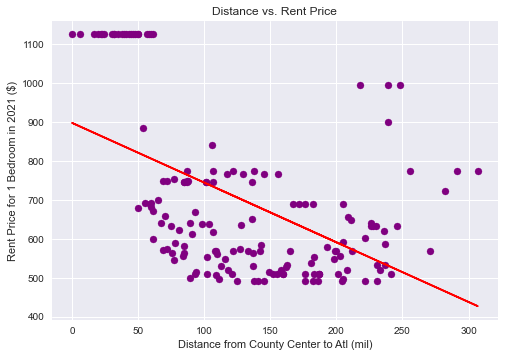

In [92]:
#create a scatter plot for Distance vs Rent Price for a 1 bedroom in 2021
#set x and y values
x_values = new_rent['Distance (miles)']
y_values = new_rent['bedroom_1_2021']

#perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values*slope + intercept

#create line equation 
line_eq = "y= " + str(slope.round(2)) + "x +" + str(intercept.round(2))
print(line_eq)

#create plot
plt.scatter(x_values,y_values, color = "purple")
plt.plot(x_values, regress_values, "r-")
plt.ylabel('Rent Price for 1 Bedroom in 2021 ($)')
plt.xlabel('Distance from County Center to Atl (mil)')
plt.title(f"Distance vs. Rent Price")
plt.annotate(line_eq,(20,15), fontsize =15,color="red")

print(f"R Value: {rvalue.round(4)}")
print(f"R^2 Value: {(rvalue**2).round(4)}")

plt.show
#Observations made from the data below.
#1. Linear regression has a negative slope indicating that the rent price decreases the further away form Atlanta you live
#2. Rent price is highest if you live within 60 miles of Atlanta
#3. Prices increased again when you get more than 200 miles outside of atlanta

## Price change with distance

In [99]:
distance_bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 310]
group_names = ["<30", "30-60", "60-90", "90-120","120-150","150-180","180-210",
               "210-240", "240-270","270-310"]

withbins = coord_county

In [100]:
withbins["Miles Range"] = pd.cut(distance, distance_bins, labels=group_names, right=False)
withbins

,state,county name,County seat,state initial,studio_2021,bedroom_1_2021,bedroom_2_2021,bedroom_3_2021,bedroom_4_2021,pop2017,lat,lng,coordinates,county,Distance (miles),Miles Range
0,13,Baker County,Newton,GA,668.0,690.0,814.0,1054.0,1215.0,3250,31.312957,-84.335742,"(31.3129575, -84.3357424)",Baker,205,180-210
1,13,Dougherty County,Albany,GA,668.0,690.0,814.0,1054.0,1215.0,91520,31.578507,-84.155741,"(31.5785074, -84.15574099999999)",Dougherty,182,180-210
2,13,Lee County,Leesburg,GA,668.0,690.0,814.0,1054.0,1215.0,29215,31.732116,-84.170742,"(31.7321156, -84.1707423)",Lee,176,150-180
3,13,Terrell County,Dawson,GA,668.0,690.0,814.0,1054.0,1215.0,8980,31.773500,-84.446583,"(31.7735001, -84.4465826)",Terrell,167,150-180
4,13,Worth County,Sylvester,GA,668.0,690.0,814.0,1054.0,1215.0,20810,31.530735,-83.835454,"(31.5307349, -83.8354542)",Worth,172,150-180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,13,Wheeler County,Alamo,GA,507.0,510.0,648.0,927.0,975.0,7950,32.147120,-82.777917,"(32.1471202, -82.7779171)",Wheeler,160,150-180
155,13,White County,Cleveland,GA,619.0,623.0,763.0,1006.0,1035.0,28510,34.597040,-83.763237,"(34.5970402, -83.7632366)",White,81,60-90
156,13,Wilcox County,Abbeville,GA,507.0,510.0,648.0,865.0,975.0,8895,31.992122,-83.306824,"(31.9921223, -83.3068243)",Wilcox,152,150-180
157,13,Wilkes County,Washington,GA,558.0,562.0,740.0,975.0,1114.0,9905,33.736795,-82.739309,"(33.7367948, -82.7393089)",Wilkes,110,90-120


In [101]:
distance_list = ["<30", "30-60", "60-90", "90-120","120-150","150-180","180-210",
               "210-240", "240-270","270-310"]

# Create empty list  for plotting
price_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for rangeDistance in distance_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    lastCount = withbins.loc[withbins["Miles Range"] == rangeDistance, "bedroom_1_2021"]
    # add subset 
    price_list.append(lastCount)
    
    # Determine outliers using upper and lower bounds
    
    quartiles = lastCount.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers= lastCount.loc[(lastCount < lower_bound)|(lastCount > upper_bound)]
    print(f"{rangeDistance}'s potential outliers: {outliers}")

<30's potential outliers: Series([], Name: bedroom_1_2021, dtype: float64)
30-60's potential outliers: 33    680.0
34    691.0
37    689.0
55    884.0
Name: bedroom_1_2021, dtype: float64
60-90's potential outliers: 25    1126.0
28    1126.0
Name: bedroom_1_2021, dtype: float64
90-120's potential outliers: Series([], Name: bedroom_1_2021, dtype: float64)
120-150's potential outliers: Series([], Name: bedroom_1_2021, dtype: float64)
150-180's potential outliers: Series([], Name: bedroom_1_2021, dtype: float64)
180-210's potential outliers: 0     690.0
1     690.0
82    656.0
Name: bedroom_1_2021, dtype: float64
210-240's potential outliers: 56    901.0
64    996.0
66    996.0
Name: bedroom_1_2021, dtype: float64
240-270's potential outliers: Series([], Name: bedroom_1_2021, dtype: float64)
270-310's potential outliers: Series([], Name: bedroom_1_2021, dtype: float64)


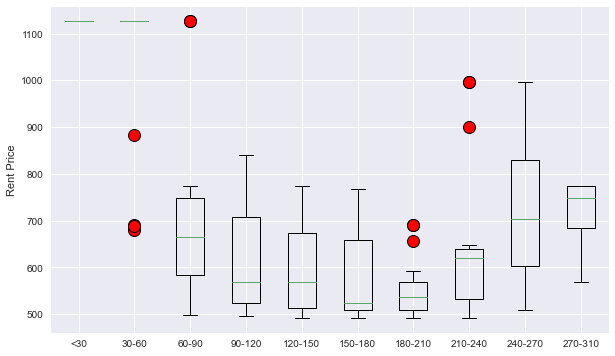

In [102]:
fig1, ax1 = plt.subplots(figsize=(10, 6))
red = dict(marker='o', markerfacecolor='r', markersize=12,)
ax1.boxplot(price_list, flierprops=red,)
plt.xticks([1, 2, 3, 4, 5, 6,7,8,9,10], distance_list)
ax1.set_ylabel('Rent Price')
            
plt.show()

In [103]:
# Finding the Average rent price of all the places with n number of bedrooms 


averagestudio = withbins.groupby(["Miles Range"]).mean()["studio_2021"]
average1bedroom = withbins.groupby(["Miles Range"]).mean()["bedroom_1_2021"]
average2bedroom = withbins.groupby(["Miles Range"]).mean()["bedroom_2_2021"]
average3bedroom = withbins.groupby(["Miles Range"]).mean()["bedroom_3_2021"]
average4bedroom = withbins.groupby(["Miles Range"]).mean()["bedroom_1_2021"]

In [104]:
# converting it into a DataFrame 

distanceRangePriceSummary = pd.DataFrame({"Average Price Studio" : averagestudio.round(2),
                                 "Average price 1bedroom ": average1bedroom.round(2),
                                 "Average price 2bedroom ": average2bedroom.round(2),
                                 "Average price 3bedroom ": average3bedroom.round(2),
                                 "Average price 4bedroom ": average4bedroom.round(2),
                                 "Miles Range":["<30", "30-60", "60-90", "90-120","120-150","150-180","180-210",
               "210-240", "240-270","270-310"], })


distanceRangePriceSummary

,Average Price Studio,Average price 1bedroom,Average price 2bedroom,Average price 3bedroom,Average price 4bedroom,Miles Range
Miles Range,,,,,,
<30,1101.00,1126.00,1284.00,1615.00,1126.00,<30
30-60,1019.37,1043.89,1205.37,1529.05,1043.89,30-60
60-90,637.00,686.50,831.47,1091.87,686.50,60-90
90-120,583.17,616.74,763.13,1002.78,616.74,90-120
120-150,571.00,603.10,724.20,963.80,603.10,120-150
150-180,553.50,573.29,706.57,942.21,573.29,150-180
180-210,539.67,551.38,678.90,895.29,551.38,180-210
210-240,632.00,648.82,798.82,1075.53,648.82,210-240
240-270,713.75,728.75,887.25,1241.25,728.75,240-270


<AxesSubplot:xlabel='Miles Range'>

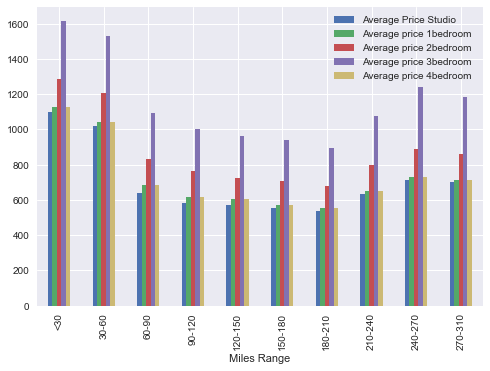

In [105]:
# plotting a bar Chart accoring to the miles range 

distanceRangePriceSummary.plot(x="Miles Range", y=["Average Price Studio",
                                                  "Average price 1bedroom ",
                                                  "Average price 2bedroom ",
                                                  "Average price 3bedroom ",
                                                  "Average price 4bedroom "], kind ="bar")

# Checking the crime Rates

## First Merge The GA Crime Dataset

In [124]:
#Export the Ga crime rate csv file and convert to DF
# Crime rate per 1000 population
crimes_df = pd.read_csv('Crime Dataset Updated/Crime_data_per_county.csv')
crimes_df

,Code,county name,"Rate/\n1,000"
0,1,Appling County,9.80
1,2,Atkinson County,12.05
2,3,Bacon County,16.58
3,4,Baker County,0.00
4,5,Baldwin County,33.73
...,...,...,...
154,155,Whitfield County,13.52
155,156,Wilcox County,8.42
156,157,Wilkes County,30.53
157,158,Wilkinson County,8.00


In [125]:
# Merge the Crime rate dataFrame with the Georgia rents DataFrame 

crime_rate_per_county = pd.merge(GA_Rents, crimes_df, how="left", on=["county name"])
crime_rate_per_county

,state,county,county name,state initial,studio_2020,studio_2021,studio_2022,bedroom_1_2020,bedroom_1_2021,bedroom_1_2022,...,bedroom_3_2021,bedroom_3_2022,bedroom_4_2020,bedroom_4_2021,bedroom_4_2022,pop2017,latitude,longitude,Code,"Rate/\n1,000"
0,13,Baker,Baker County,GA,643,668.0,562.0,666,690.0,581.0,...,1054.0,887.0,1151,1215.0,1036.0,3250,44.76523,-117.67692,4,0.00
1,13,Dougherty,Dougherty County,GA,643,668.0,711.0,666,690.0,737.0,...,1054.0,1121.0,1151,1215.0,1359.0,91520,31.543937,-84.22788,47,54.43
2,13,Lee,Lee County,GA,643,668.0,711.0,666,690.0,737.0,...,1054.0,1121.0,1151,1215.0,1359.0,29215,26.663029,-81.953481,88,16.70
3,13,Terrell,Terrell County,GA,643,668.0,711.0,666,690.0,737.0,...,1054.0,1121.0,1151,1215.0,1359.0,8980,30.234861,-102.163272,135,11.41
4,13,Worth,Worth County,GA,643,668.0,711.0,666,690.0,737.0,...,1054.0,1121.0,1151,1215.0,1359.0,20810,31.528249,-83.889706,159,16.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,13,Wheeler,Wheeler County,GA,513,507.0,545.0,516,510.0,549.0,...,927.0,870.0,998,975.0,955.0,7950,44.665977,-120.082962,153,4.46
155,13,White,White County,GA,602,619.0,693.0,606,623.0,698.0,...,1006.0,1052.0,1035,1035.0,1121.0,28510,34.656773,-83.719914,154,11.03
156,13,Wilcox,Wilcox County,GA,513,507.0,545.0,516,510.0,549.0,...,865.0,1000.0,998,975.0,1036.0,8895,32.010544,-87.34136,156,8.42
157,13,Wilkes,Wilkes County,GA,557,558.0,592.0,560,562.0,596.0,...,975.0,1035.0,1132,1114.0,1154.0,9905,36.202858,-81.251883,157,30.53


### Correlation between Crime rate and distance from the center 

y= -0.0x +14.05
R Value: -0.0231
R^2 Value: 0.0005


<function matplotlib.pyplot.show(close=None, block=None)>

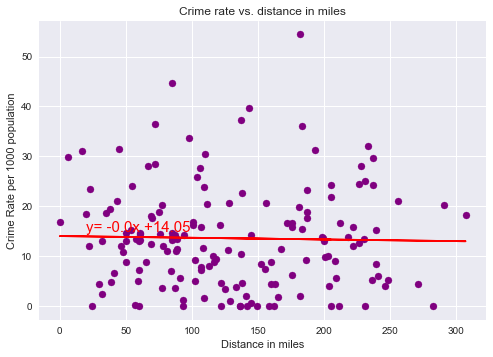

In [130]:
# making a scatter plot for crime rate 

#create a scatter plot for Distance vs Rent Price for a 1 bedroom in 2021
#set x and y values
x_values = new_rent['Distance (miles)']
y_values = crime_rate_per_county['Rate/\n1,000']

#perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values*slope + intercept

#create line equation 
line_eq = "y= " + str(slope.round(2)) + "x +" + str(intercept.round(2))
print(line_eq)

#create plot
plt.scatter(x_values,y_values, color = "purple")
plt.plot(x_values, regress_values, "r-")
plt.ylabel('Crime Rate per 1000 population')
plt.xlabel('Distance in miles')
plt.title(f"Crime rate vs. distance in miles")
plt.annotate(line_eq,(20,15), fontsize =15,color="red")

print(f"R Value: {rvalue.round(4)}")
print(f"R^2 Value: {(rvalue**2).round(4)}")

plt.show

# Which County does Paul want to Move to?
## Paul wants to stay close to the city (Atlanta, Savannah or Augusta) but he needs to find the crime rates in the counties that I'm interested in. 

### The counties that Paul prefers to move to are:
### Coweta County
### Chatham County
### Cherokee County
### Carroll County
### Columbia County

In [126]:
Five_counties_crime_rate = crime_rate_per_county.loc[(crime_rate_per_county["county name"] == "Coweta County")|
                                                    (crime_rate_per_county["county name"] == "Chatham County")|
                                                    (crime_rate_per_county["county name"] == "Cherokee County")|
                                                    (crime_rate_per_county["county name"] == "Carroll County")|
                                                    (crime_rate_per_county["county name"] == "Columbia County")                             
                                                   ]
                                                     
Five_counties_crime_rate 

Five_Counties_cleanedDF =  Five_counties_crime_rate.loc[:, ["county name" , "bedroom_1_2021", "Rate/\n1,000" ]]
Five_Counties_cleanedDF

,county name,bedroom_1_2021,"Rate/\n1,000"
11,Carroll County,1126.0,14.70
12,Cherokee County,1126.0,6.67
15,Coweta County,1126.0,19.56
39,Columbia County,767.0,0.97
65,Chatham County,996.0,5.22


## Need to find a Leasing Office

In [109]:
leasing_office_find = new_rent.loc[(new_rent["county name"] == "Coweta County")|
                                   (new_rent["county name"] == "Chatham County")|
                                   (new_rent["county name"] == "Cherokee County")|
                                   (new_rent["county name"] == "Carroll County")|
                                   (new_rent["county name"] == "Columbia County")]
leasing_office_find
leasing_office_find

,state,county name,County seat,state initial,Distance (miles),bedroom_1_2021,lat,lng
11,13,Carroll County,Carrollton,GA,50,1126.0,33.580110,-85.076611
12,13,Cherokee County,Canton,GA,41,1126.0,34.236762,-84.490762
15,13,Coweta County,Newnan,GA,38,1126.0,33.380672,-84.799657
39,13,Columbia County,Appling,GA,129,767.0,33.546090,-82.316315
65,13,Chatham County,Savannah,GA,248,996.0,32.080899,-81.091203


In [111]:
params = {
    "radius": 30,
    "types": "office",
    "keyword": "leasing office",
    "key": g_key}
for index, row in leasing_office_find.iterrows():
    lat = row["lat"]
    lng = row["lng"]
    params["location"] = f"{lat},{lng}"
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    name_address = requests.get(base_url, params=params)
    name_address = name_address.json()
    try:
        leasing_office_find.loc[index, 'Leasing Office'] = name_address["results"][0]["name"]
        leasing_office_find.loc[index, 'Leasing Office Address'] = name_address["results"][0]["vicinity"]
        leasing_office_find.loc[index, 'Leasing Office Rating'] = name_address["results"][0]["rating"]
    except (KeyError, IndexError):
        leasing_office_find.loc[index, 'Leasing Office'] = "No leasing office nearby"
        leasing_office_find.loc[index, 'Leasing Office Address'] = "No"
        leasing_office_find.loc[index, 'Leasing Office Rating'] = "No"
        print("Missing field/result... skipping.")
leasing_office_find

Missing field/result... skipping.


,state,county name,County seat,state initial,Distance (miles),bedroom_1_2021,lat,lng,Leasing Office,Leasing Office Address,Leasing Office Rating
11,13,Carroll County,Carrollton,GA,50,1126.0,33.580110,-85.076611,Eagle South Properties,"402 Adamson Square, Carrollton",0.0
12,13,Cherokee County,Canton,GA,41,1126.0,34.236762,-84.490762,Cherokee North Apts.,"50 North St, Canton",3.2
15,13,Coweta County,Newnan,GA,38,1126.0,33.380672,-84.799657,Turner Residential Rentals LLC,Newnan,0.0
39,13,Columbia County,Appling,GA,129,767.0,33.546090,-82.316315,No leasing office nearby,No,No
65,13,Chatham County,Savannah,GA,248,996.0,32.080899,-81.091203,The Broughton Street Collection Lofts,"111 W Broughton St, Savannah",0


# Locating the Leasing office on Google Maps

In [112]:
locations = leasing_office_find[["lat", "lng"]]
weights = leasing_office_find["bedroom_1_2021"]
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=weights,
                                 dissipating=False, max_intensity=500, point_radius = 1)
fig.add_layer(heat_layer)
info_box_template = """
<dl>
<dt>Name</dt><dd>{Leasing Office}</dd>
<dt>City</dt><dd>{County seat}</dd>
<dt>Rent_Price_1bedroom</dt><dd>{bedroom_1_2021}</dd>
</dl>
"""
leasing_office_info = [info_box_template.format(**row) for index, row in leasing_office_find.iterrows()]
locations = leasing_office_find[["lat", "lng"]]

In [113]:
#heat map and adding red marker
marker_layer = gmaps.marker_layer(locations, info_box_content = leasing_office_info)
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))

## From the table and google map above, we can conclude that Columbia County has the cheapest Rent rates for a 1 bedroom apartment and the Least number of crime rate